In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score



In [67]:
#importing data
df = pd.read_csv('HR_Dataset.csv')

In [28]:
#checking data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [30]:
#checking data
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
943,0.81,1.00,5,235,5,0,1,0
6387,0.61,0.62,2,192,2,1,0,0
1829,0.10,0.93,6,258,4,0,1,0
7214,0.57,0.98,3,236,3,1,0,0
11758,0.58,0.84,4,206,7,0,0,1


In [4]:
#checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
#checking data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
#checking data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,14999,NaN,NaN,NaN,0.612834,0.248631,0.09,0.44,0.64,0.82,1
last_evaluation,14999,NaN,NaN,NaN,0.716102,0.171169,0.36,0.56,0.72,0.87,1
number_project,14999,NaN,NaN,NaN,3.80305,1.23259,2,3,4,5,7
average_montly_hours,14999,NaN,NaN,NaN,201.05,49.9431,96,156,200,245,310
time_spend_company,14999,NaN,NaN,NaN,3.49823,1.46014,2,3,3,4,10
Work_accident,14999,NaN,NaN,NaN,0.14461,0.351719,0,0,0,0,1
left,14999,NaN,NaN,NaN,0.238083,0.425924,0,0,0,0,1
promotion_last_5years,14999,NaN,NaN,NaN,0.0212681,0.144281,0,0,0,0,1
Departments,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,14999,3,low,7316,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#checking data
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [9]:
#checking data
df.cov()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,0.061817,0.004469,-0.043814,-0.248945,-0.036618,0.005133,-0.041128,0.000919
last_evaluation,0.004469,0.029299,0.073703,2.904356,0.032888,-0.000428,0.000479,-0.000214
number_project,-0.043814,0.073703,1.519284,25.683271,0.354166,-0.002055,0.012488,-0.001078
average_montly_hours,-0.248945,2.904356,25.683271,2494.313175,9.316364,-0.178169,1.516419,-0.025541
time_spend_company,-0.036618,0.032888,0.354166,9.316364,2.131998,0.001089,0.090066,0.014206
Work_accident,0.005133,-0.000428,-0.002055,-0.178169,0.001089,0.123706,-0.023163,0.001992
left,-0.041128,0.000479,0.012488,1.516419,0.090066,-0.023163,0.181411,-0.003797
promotion_last_5years,0.000919,-0.000214,-0.001078,-0.025541,0.014206,0.001992,-0.003797,0.020817


In [15]:
from scipy.stats import pearsonr

In [32]:
#checking data (correlation table with significany level)
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
corr_table_sig = rho.round(2).astype(str) + p
corr_table_sig

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.0***,0.11***,-0.14***,-0.02**,-0.1***,0.06***,-0.39***,0.03***
last_evaluation,0.11***,1.0***,0.35***,0.34***,0.13***,-0.01,0.01,-0.01
number_project,-0.14***,0.35***,1.0***,0.42***,0.2***,-0.0,0.02***,-0.01
average_montly_hours,-0.02**,0.34***,0.42***,1.0***,0.13***,-0.01,0.07***,-0.0
time_spend_company,-0.1***,0.13***,0.2***,0.13***,1.0***,0.0,0.14***,0.07***
Work_accident,0.06***,-0.01,-0.0,-0.01,0.0,1.0***,-0.15***,0.04***
left,-0.39***,0.01,0.02***,0.07***,0.14***,-0.15***,1.0***,-0.06***
promotion_last_5years,0.03***,-0.01,-0.01,-0.0,0.07***,0.04***,-0.06***,1.0***


In [33]:
corr_table_sig[['left']]

,left
satisfaction_level,-0.39***
last_evaluation,0.01
number_project,0.02***
average_montly_hours,0.07***
time_spend_company,0.14***
Work_accident,-0.15***
left,1.0***
promotion_last_5years,-0.06***


<AxesSubplot:>

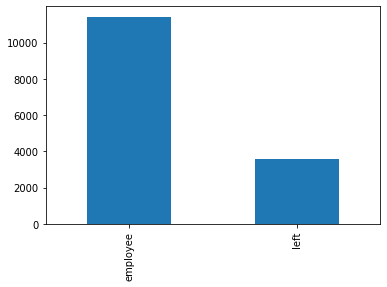

In [25]:
#distiribution of left column
x=['employee','left']
df.left.apply(lambda x: 'employee' if x==0 else 'left').value_counts().plot.bar()

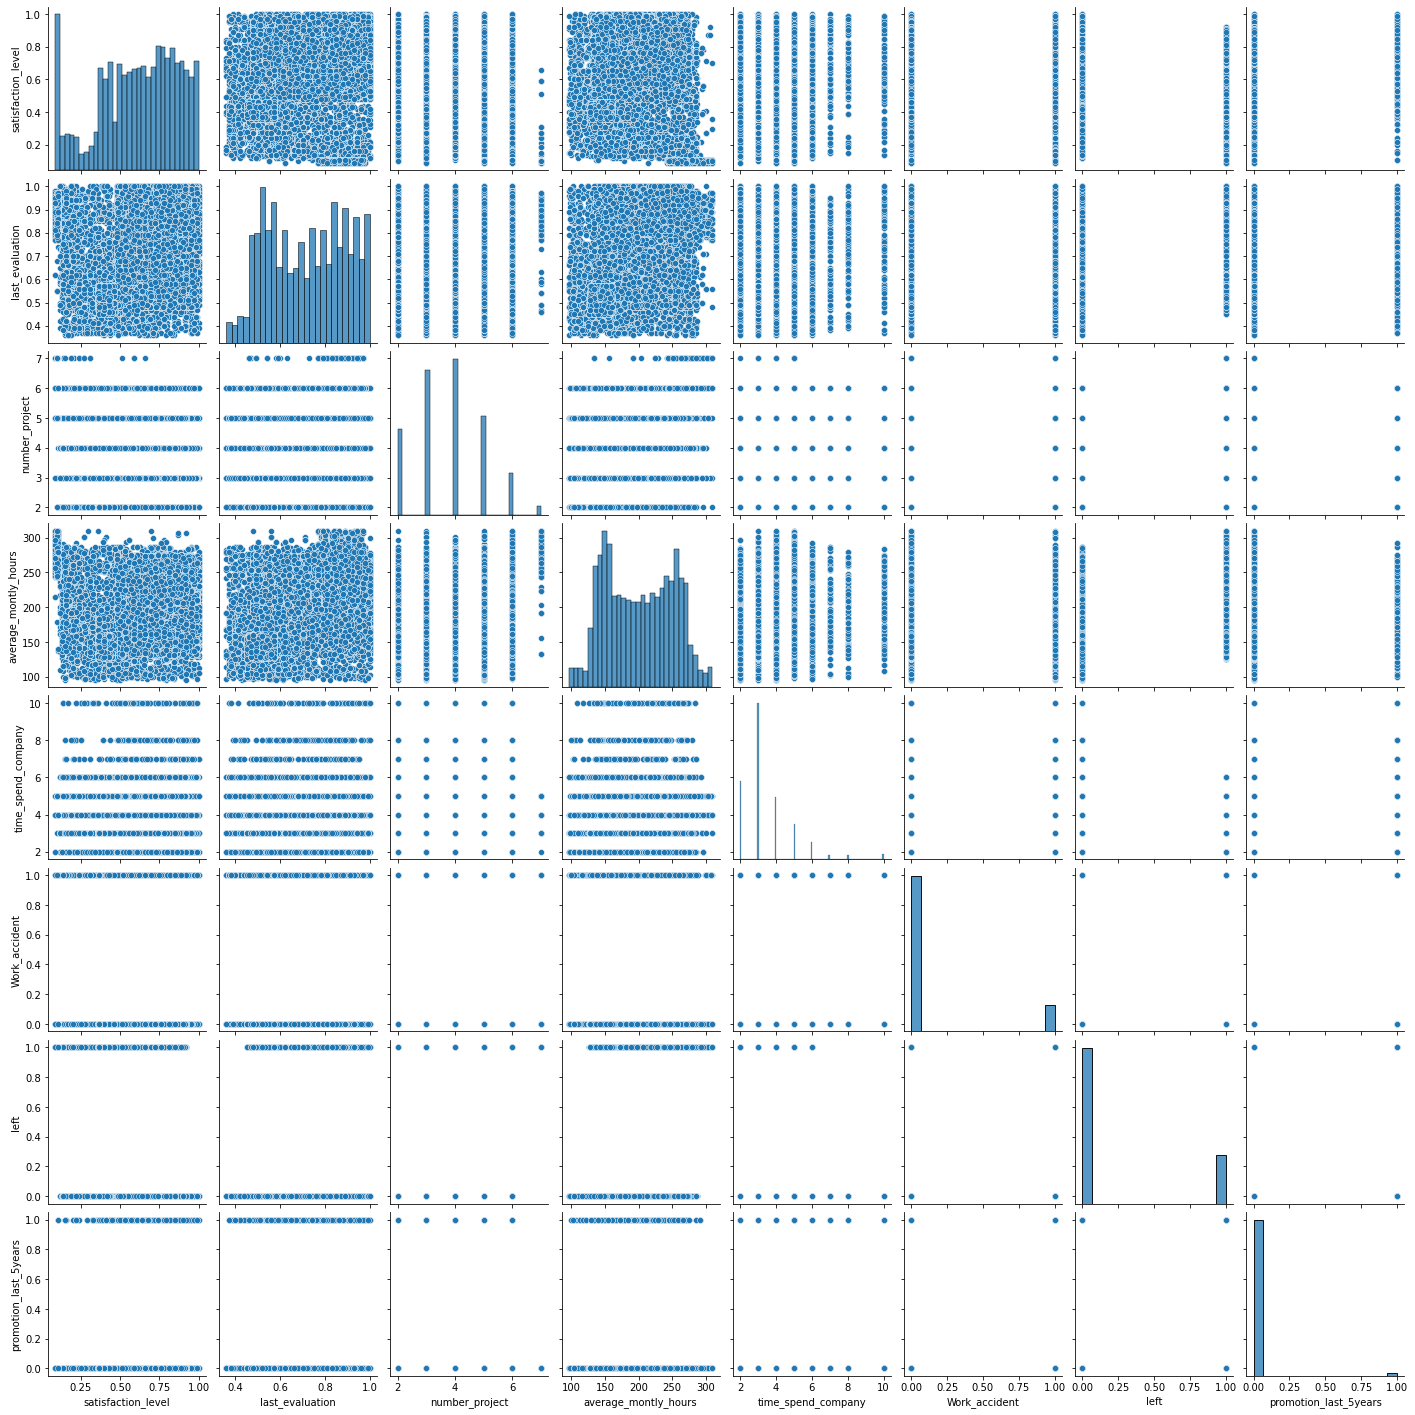

In [35]:
sns.pairplot(df)

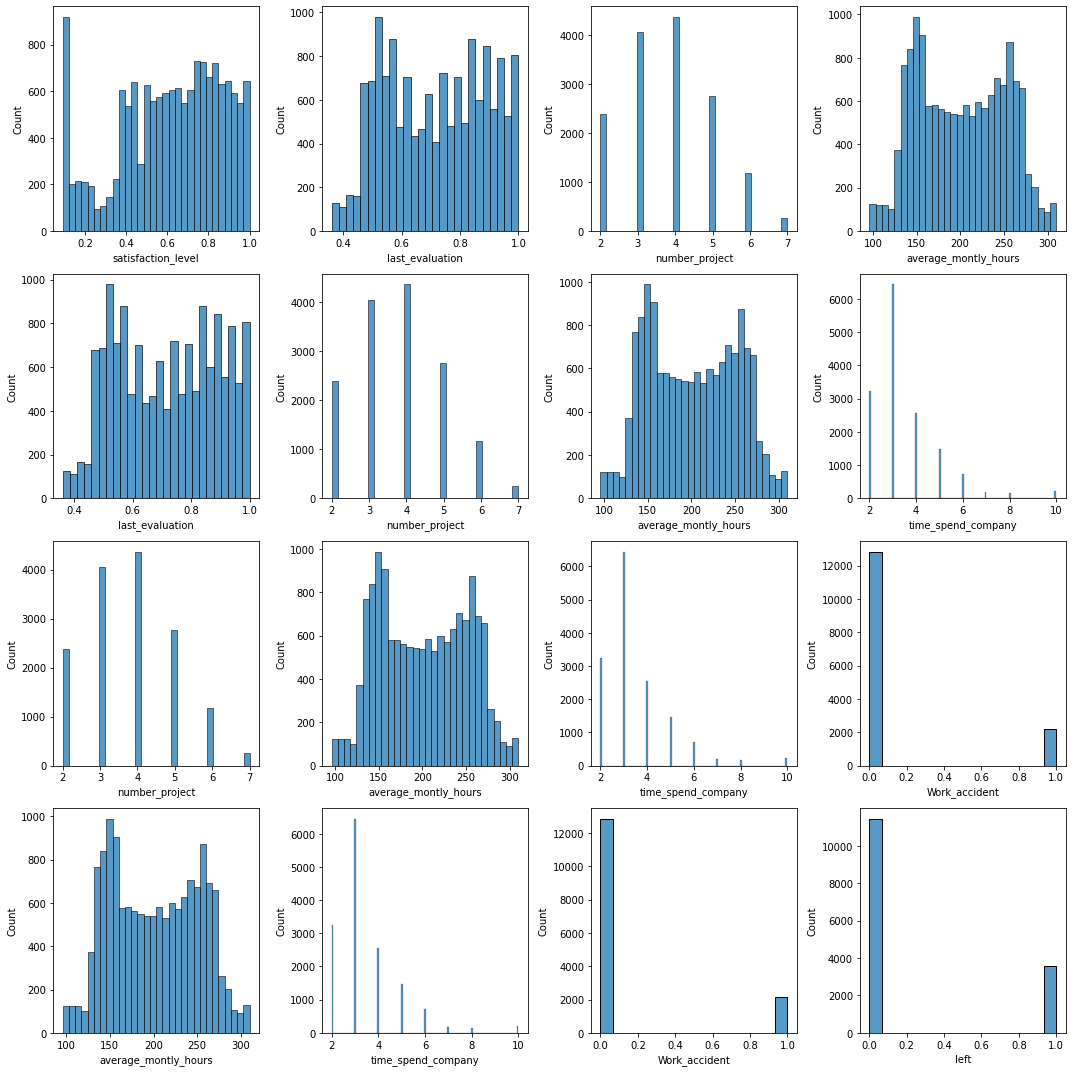

In [249]:
#distiribution of columns
fig, axs = plt.subplots(4,4, figsize=(15,15))
for i in range(4):
    for j in range(4):
        sns.histplot(df.iloc[:,i+j], ax= axs[i,j])
plt.tight_layout()

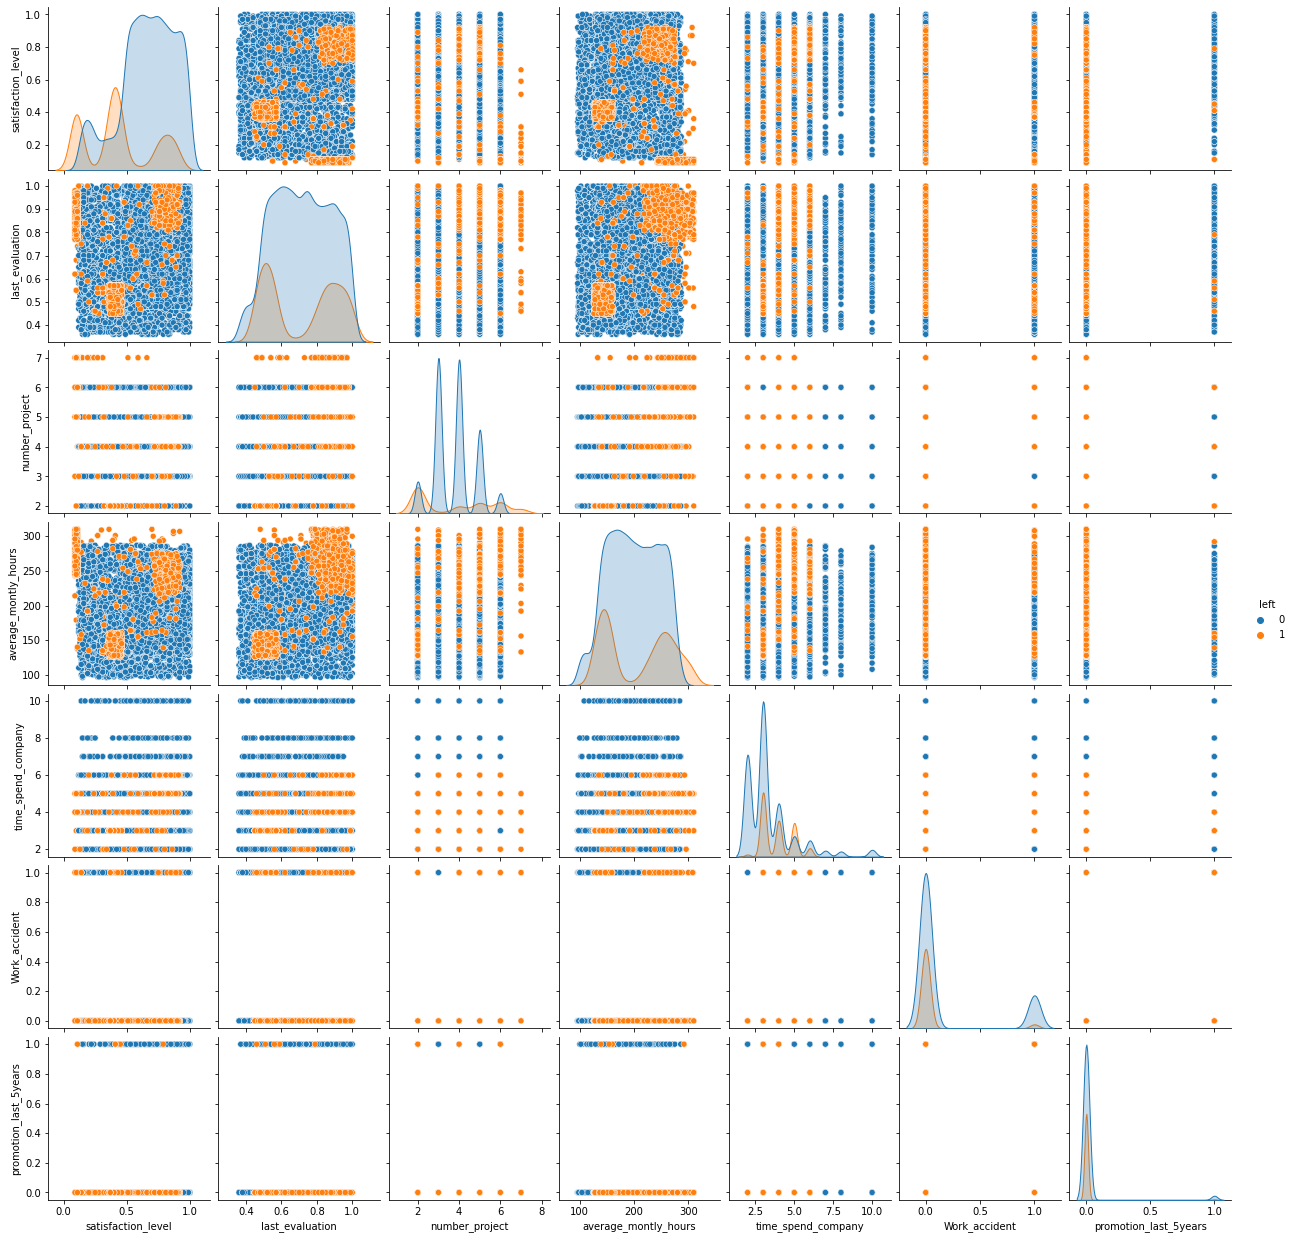

In [49]:
#showing differences between left and continued
sns.pairplot(df, hue="left")

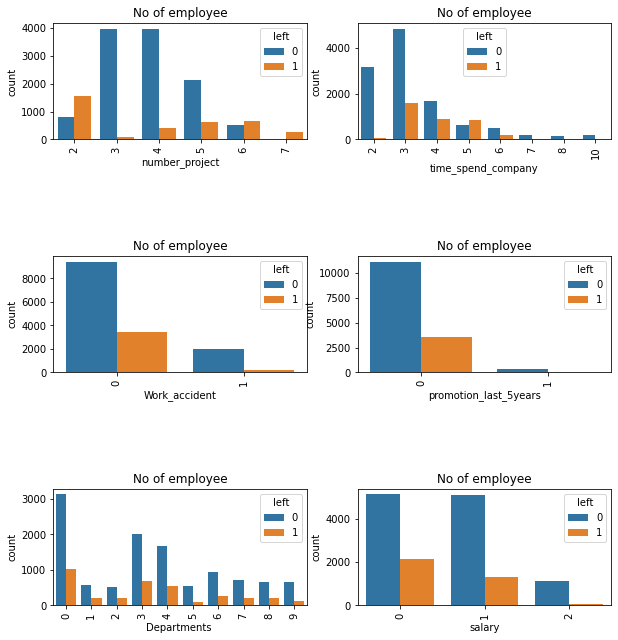

In [250]:
#showing differences between left and continued
features=['number_project','time_spend_company','Work_accident', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue = "left")
    plt.xticks(rotation=90)
    plt.title("No of employee")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [68]:
df['Departments '].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Departments , dtype: int64

In [69]:
#giving values for deparment column
a = 0
for i in df['Departments '].unique():
    df['Departments '] = df['Departments '].apply(lambda x: a if x==i else x)
    a+=1

In [70]:
df['Departments '].value_counts()

0    4140
3    2720
4    2229
6    1227
7     902
8     858
9     787
1     767
2     739
5     630
Name: Departments , dtype: int64

In [71]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [72]:
#giving values for salary column
a = 0
for i in df['salary'].unique():
    df['salary'] = df['salary'].apply(lambda x: a if x==i else x)
    a+=1

In [73]:
df['salary'].value_counts()

0    7316
1    6446
2    1237
Name: salary, dtype: int64

In [74]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [76]:
hopkins(df.drop('left', axis=1),df.shape[0])

0.22873913828017692

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = df.drop('left', axis=1)
y = df.left
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [297]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

In [82]:
#scaling variables before using in the model
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [84]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [264]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix

In [267]:
gb = GradientBoostingClassifier()
gb.fit(X_train_s, y_train)
y_pred = gb.predict(X_test_s)
gb_acc = accuracy_score(y_test, y_pred)
gb_f1_macro = f1_score(y_test, y_pred, average = "macro")
gb_f1_weighted = f1_score(y_test, y_pred, average = "weighted")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3386   42]
 [  82  990]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3428
           1       0.96      0.92      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.97      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [219]:
from sklearn.neighbors import KNeighborsClassifier

In [268]:
knn = KNeighborsClassifier()
knn.fit(X_train_s, y_train)
y_pred = knn.predict(X_test_s)
knn_acc = accuracy_score(y_test, y_pred)
knn_f1_macro = f1_score(y_test, y_pred, average = "macro")
knn_f1_weighted = f1_score(y_test, y_pred, average = "weighted")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3318  110]
 [ 103  969]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3428
           1       0.90      0.90      0.90      1072

    accuracy                           0.95      4500
   macro avg       0.93      0.94      0.93      4500
weighted avg       0.95      0.95      0.95      4500



In [226]:
from sklearn.ensemble import RandomForestClassifier

In [274]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
rf_f1_macro = f1_score(y_test, y_pred, average = "macro")
rf_f1_weighted = f1_score(y_test, y_pred, average = "weighted")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3420    8]
 [  47 1025]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



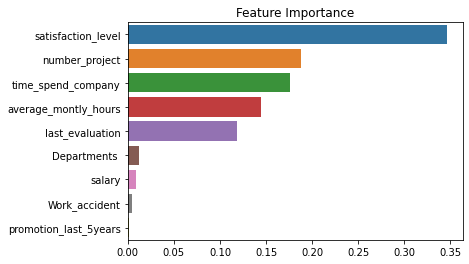

In [275]:
#showing importance of each feature to outcome
feature_imp = pd.Series(rf_model.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

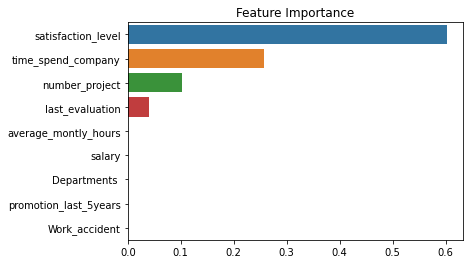

In [232]:
#showing importance of each feature to outcome
feature_imp = pd.Series(model_grand.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

<AxesSubplot:xlabel='value', ylabel='model'>

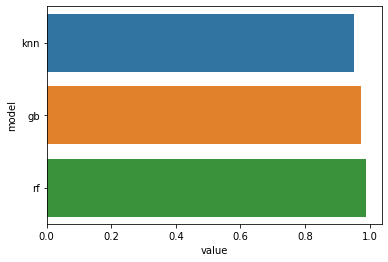

In [307]:
#showing differences between used models
a= pd.DataFrame(zip([gb_acc,knn_acc,rf_acc], ['gb','knn','rf']), columns=['value','model'])
sns.barplot(x='value', y='model', data=a.sort_values('value'))